### Kernel Logistic Regression

[Source code is here.]()

In this blog post I have implemented kernel logistic regression. Kernel logistic regression is a lot like regular linear logistic regression except we modify the data beforehand in order to still be able to use linear regression on nonlinear data.

In [1]:
from kernel_logreg import KernelLogisticRegression

import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from scipy.optimize import minimize
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
np.seterr(all='ignore')

def draw_line(w, x_min, x_max, color="black", ax=None, alpha=1):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    if ax is None:
        plt.plot(x, y, color = color, alpha=alpha)
    else:
        ax.plot(x, y, color = color, alpha=alpha)

def construct_plot(X, y, clf, ax=None, title="Accuracy = "):
    plot_decision_regions(X, y, clf=clf, ax=ax)
    if ax is None: ax = plt.gca()
    title = ax.set(title = f"{title}{(KLR.predict(X) == y).mean()}",
                        xlabel = "Feature 1", 
                        ylabel = "Feature 2")

## Experiments

### Experiment 1: Basic Check

Here I am just confirming that all of my code actually works.

Running a test on moon shaped data with `gamma=0.1` I get a model that is a pretty good fit for both train and test data.


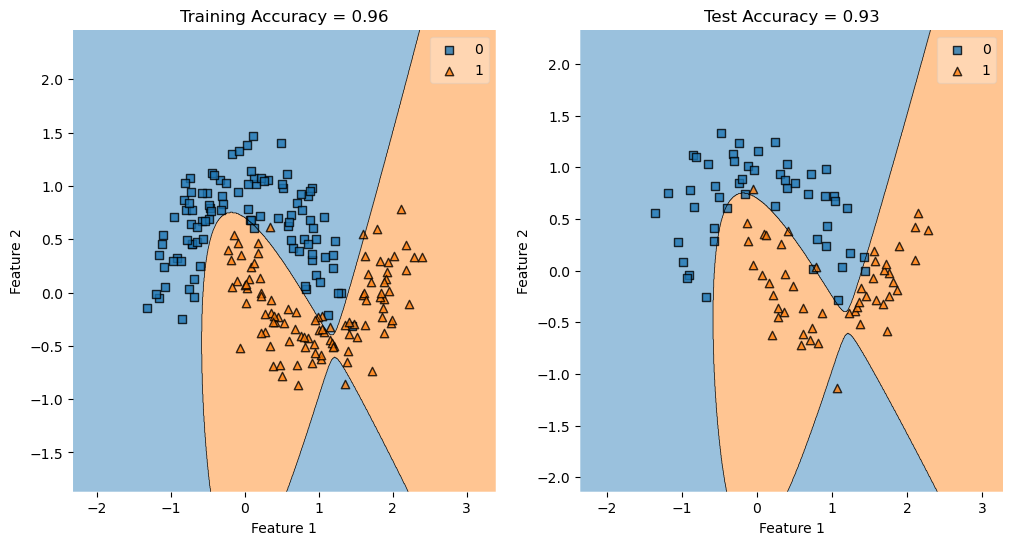

In [3]:
X_train, y_train = make_moons(200, shuffle = True, noise = 0.2)
KLR = KernelLogisticRegression(rbf_kernel, gamma = .1)
KLR.fit(X_train, y_train)

X_test, y_test = make_moons(100, shuffle = True, noise = 0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

construct_plot(X_train, y_train, KLR, ax1, "Training Accuracy = ")
construct_plot(X_test, y_test, KLR, ax2, "Test Accuracy = ")

### Experiment 2: Choosing Gamma

In this experiment I will demonstrate the importance of choosing a good gamma value. A gamma too low will underfit the data, but a gamma too high will overfit the data. As we can see values for gamma above 1 begin to lose accuracy on the test set.

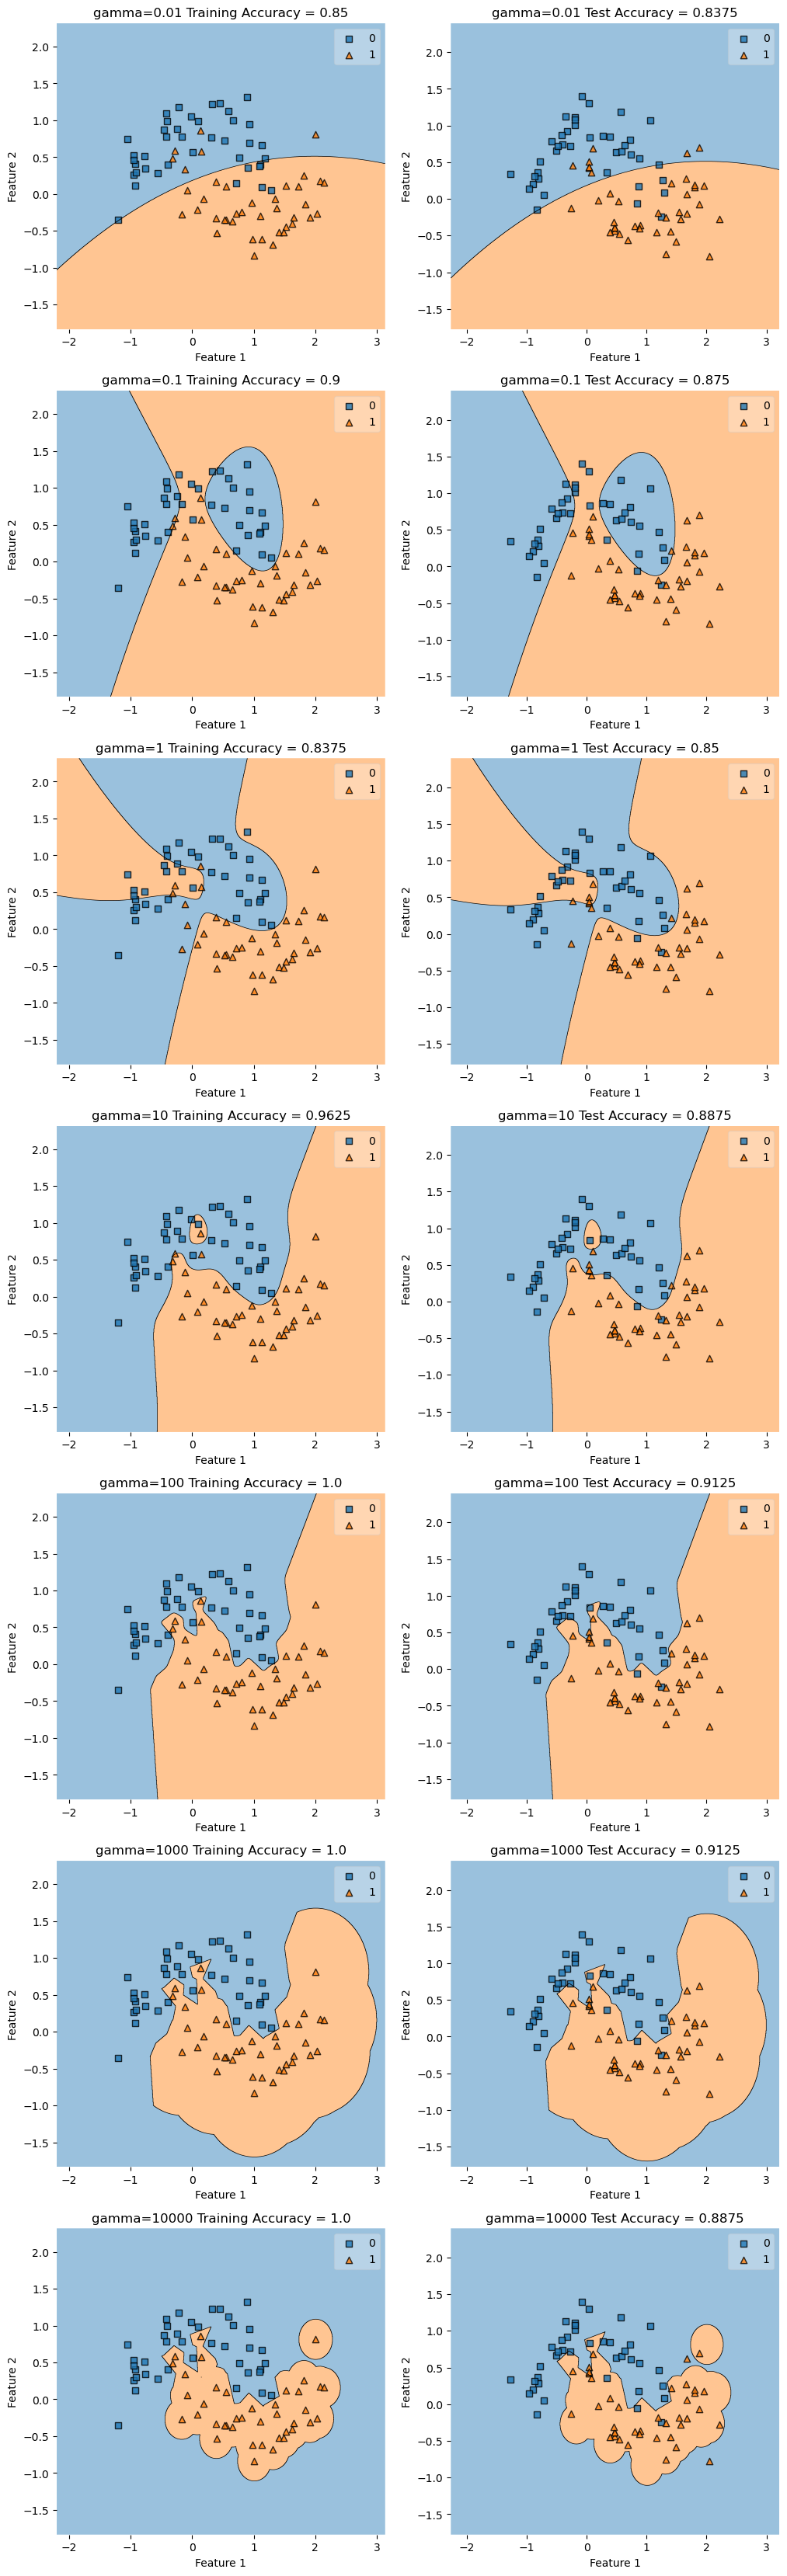

In [4]:
X_train, y_train = make_moons(80, shuffle = True, noise = 0.2)
X_test, y_test = make_moons(80, shuffle = True, noise = 0.2)
gammas = [.01, .1, 1, 10, 100, 1000, 10000]
fig, axarr = plt.subplots(len(gammas), 2, figsize=(12, 6*len(gammas)))

for i, gamma in enumerate(gammas):
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"gamma={gamma} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"gamma={gamma} Test Accuracy = ")

### Experiment 3: Varied Noise

In this experiment I vary the noise paramater of the `make_moons` function, and I test what values of gamma are best with increased noise. 

In the last experiment we tested with `noise=.2` and saw that a gamma value of around 1 was sufficient. 

##### Testing with `Noise=.05`

From this test we can gather that when there is very little noise (and very little difference between the train and test data), we just need a high enough gamma to follow the shape. 

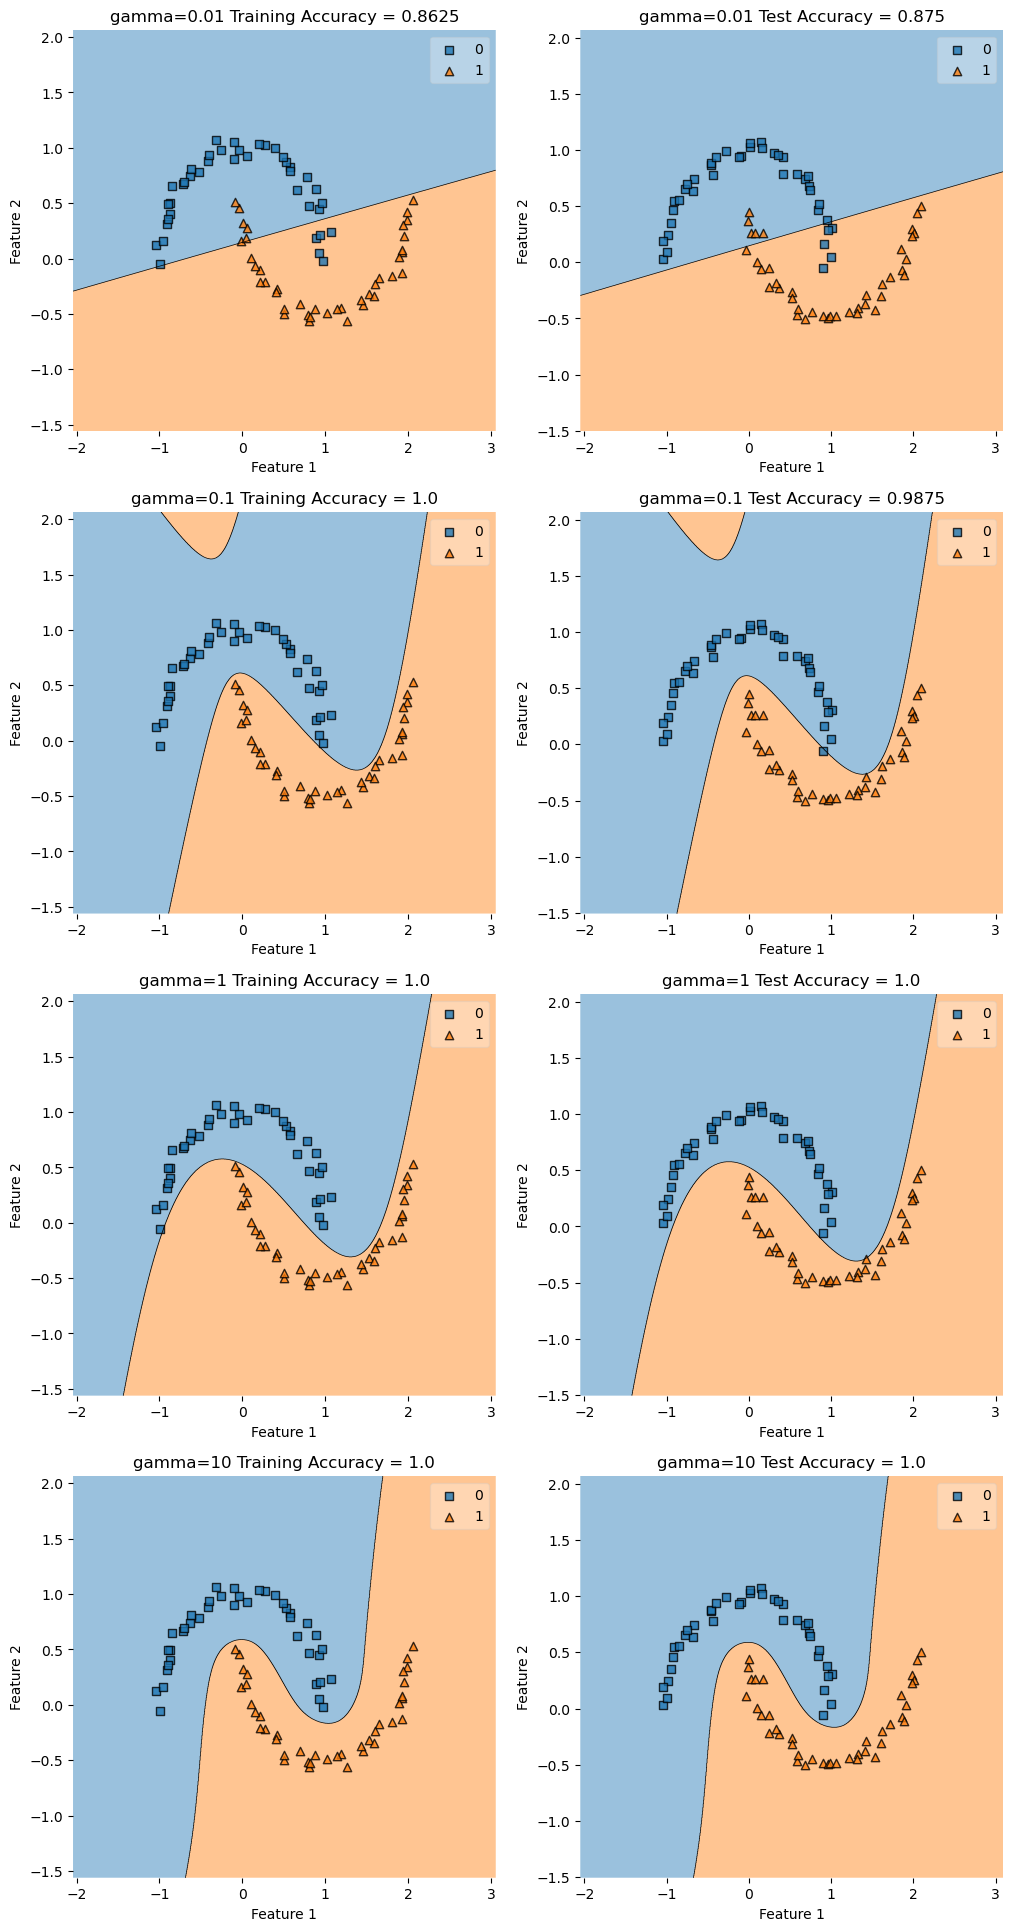

In [5]:
X_train, y_train = make_moons(80, shuffle = True, noise = 0.05)
X_test, y_test = make_moons(80, shuffle = True, noise = 0.05)
gammas = [.01, .1, 1, 10]
fig, axarr = plt.subplots(len(gammas), 2, figsize=(12, 6*len(gammas)))

for i, gamma in enumerate(gammas):
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"gamma={gamma} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"gamma={gamma} Test Accuracy = ")

##### Testing with `Noise=.04`

In this test we see that a gamma of .1 does a the best at matching the shape we want. Higher than .1 is overfit and below .1 is underfit.

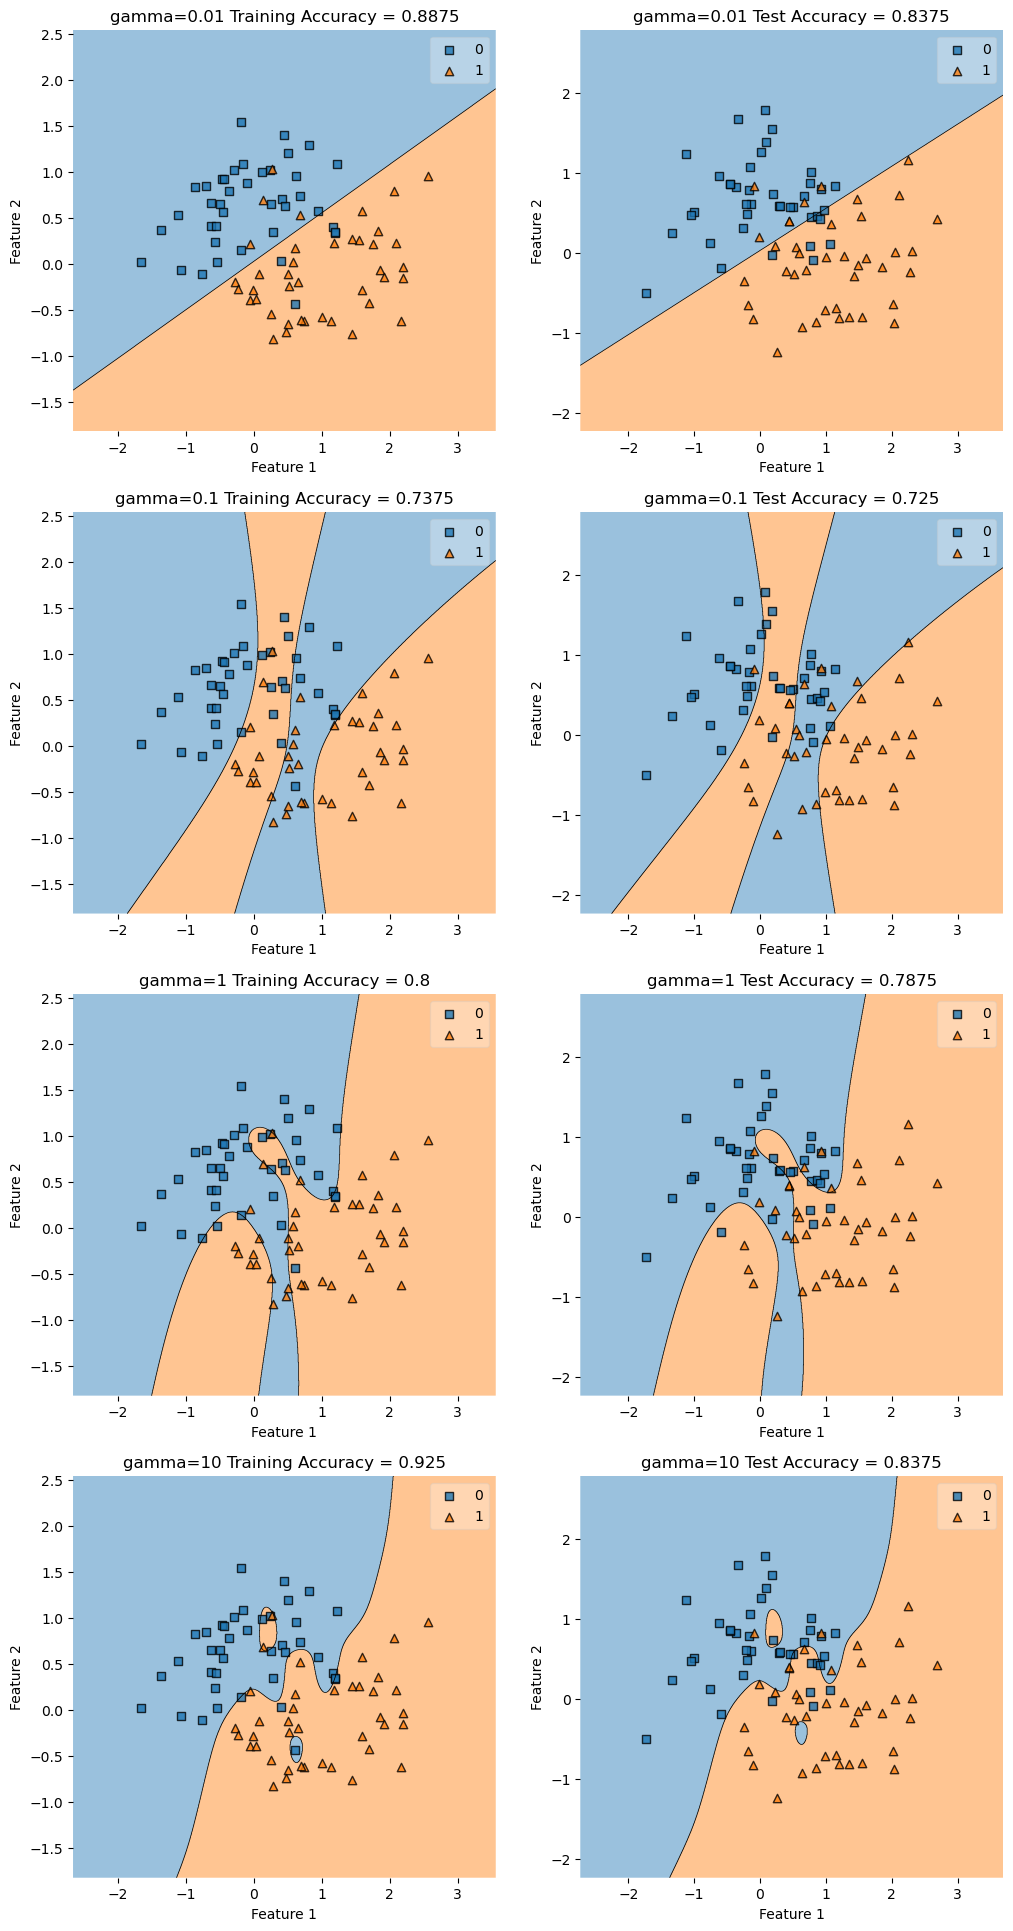

In [6]:
X_train, y_train = make_moons(80, shuffle = True, noise = 0.4)
X_test, y_test = make_moons(80, shuffle = True, noise = 0.4)
gammas = [.01, .1, 1, 10]
fig, axarr = plt.subplots(len(gammas), 2, figsize=(12, 6*len(gammas)))

for i, gamma in enumerate(gammas):
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"gamma={gamma} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"gamma={gamma} Test Accuracy = ")

##### Conclusions from Experiment 3

Overall, I don't have enough evidence to suggest that the best value for gamma depends on the noise level. This generally matches what I have seen in the documentation that assigns gamma based off of the size of the training set.

### Experiment 4: Other Shapes

##### Testing with `gamma=.1`

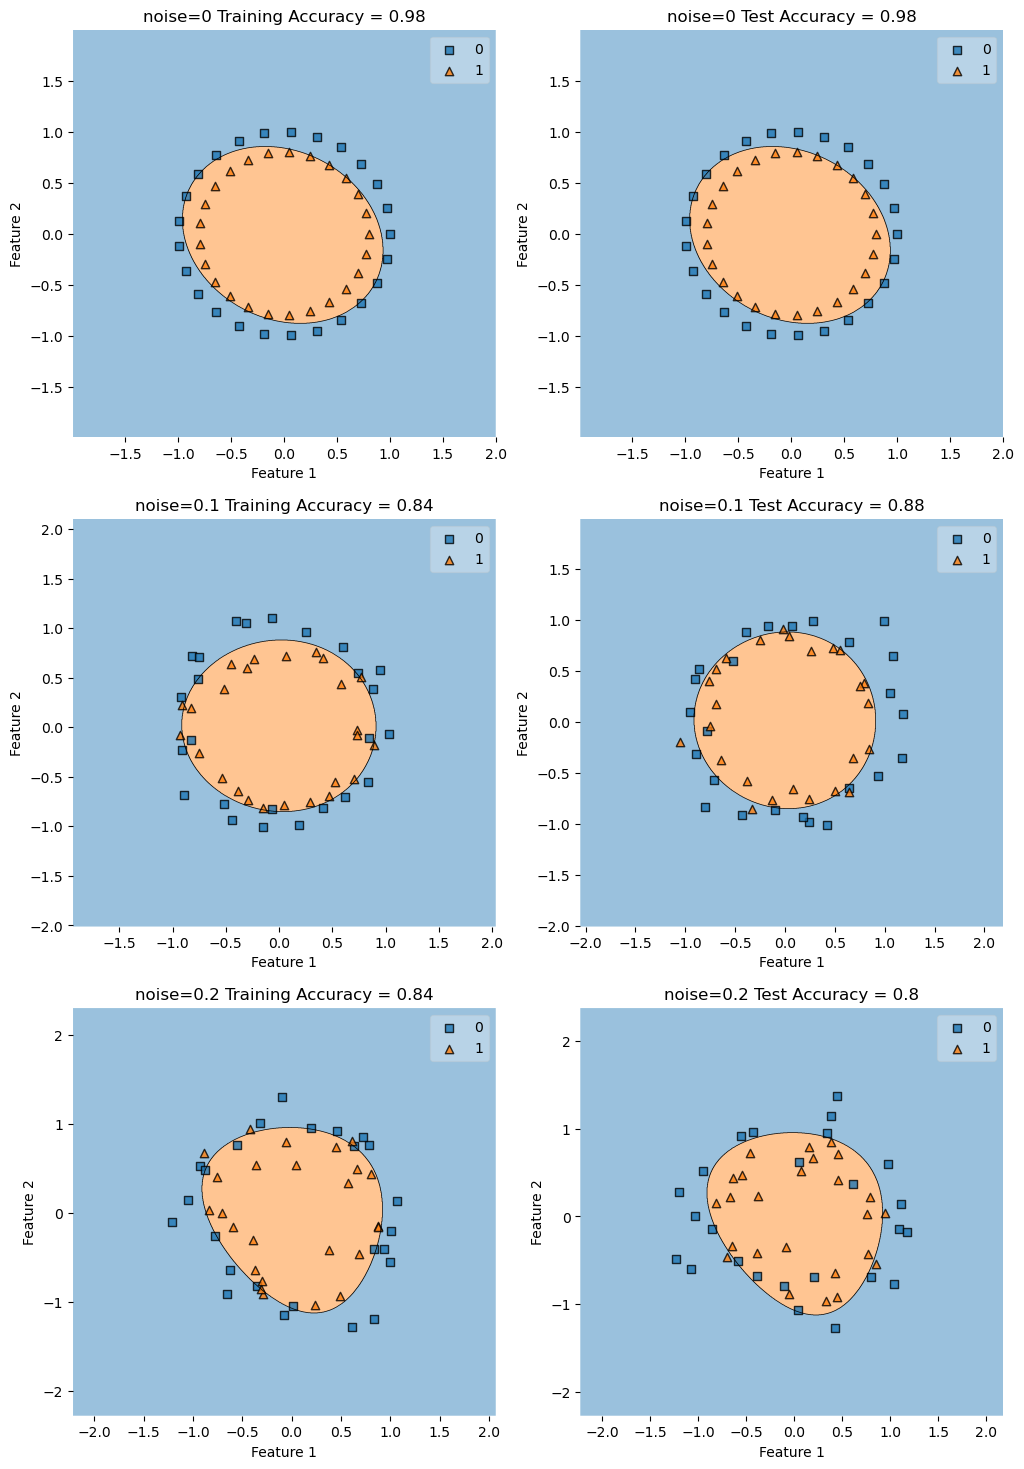

In [7]:
noises = [0, .1, .2]
fig, axarr = plt.subplots(len(noises), 2, figsize=(12, 6*len(noises)))
gamma = .1
for i, noise in enumerate(noises):
    X_train, y_train = make_circles(50, shuffle = True, noise = noise)
    X_test, y_test = make_circles(50, shuffle = True, noise = noise)
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"noise={noise} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"noise={noise} Test Accuracy = ")

##### Testing with `gamma=1`

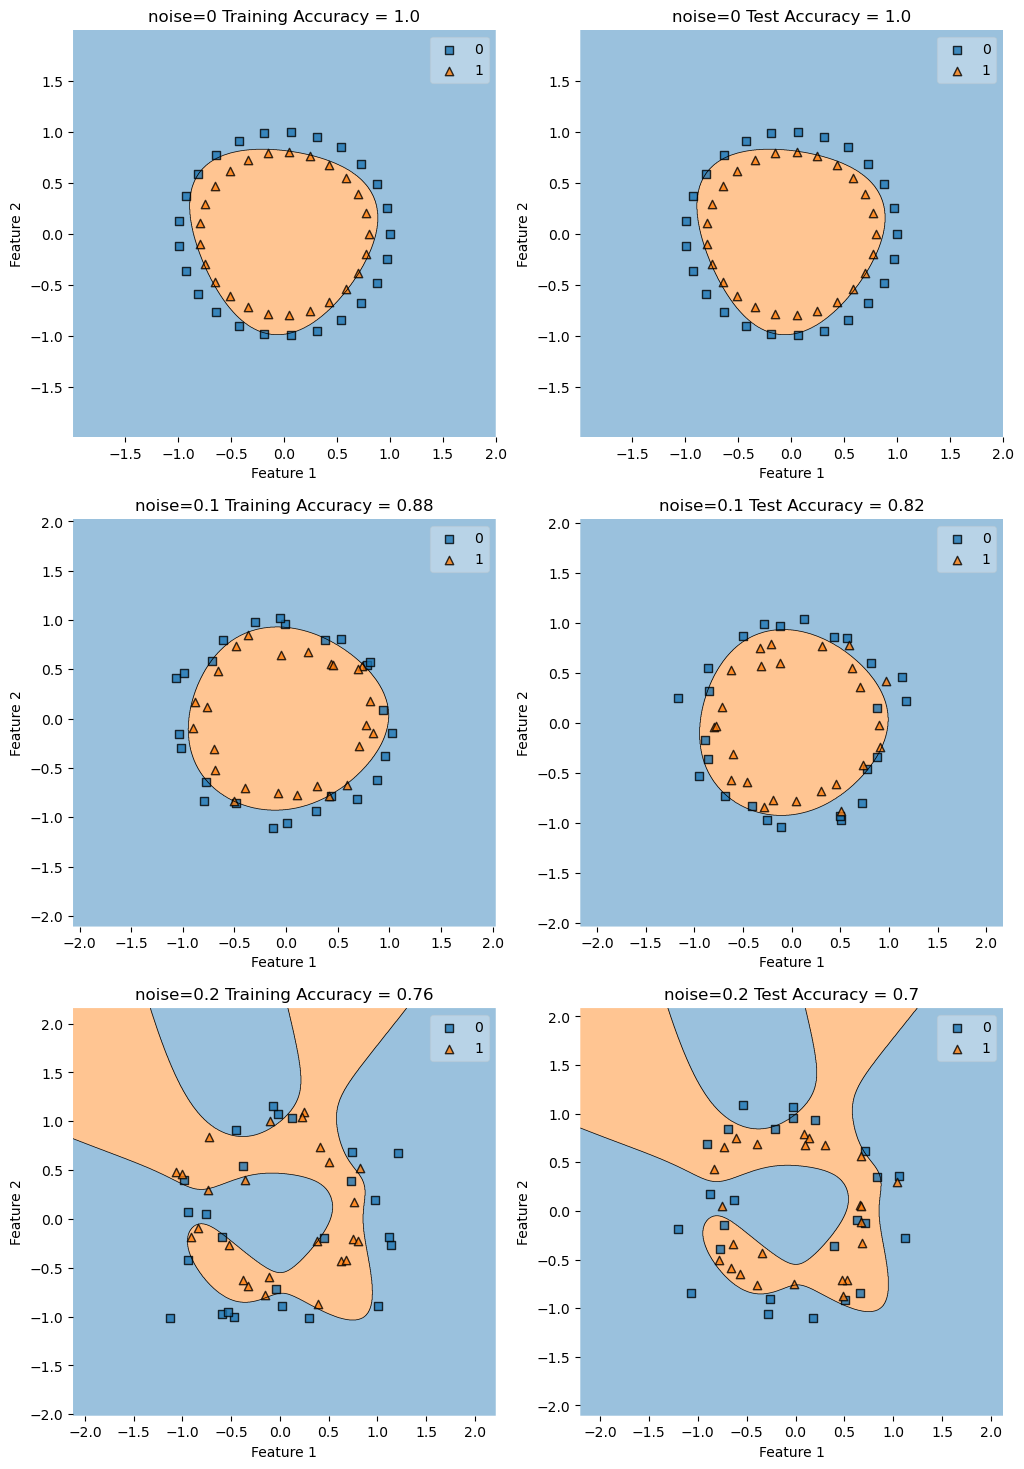

In [8]:
noises = [0, .1, .2]
fig, axarr = plt.subplots(len(noises), 2, figsize=(12, 6*len(noises)))
gamma = 1
for i, noise in enumerate(noises):
    X_train, y_train = make_circles(50, shuffle = True, noise = noise)
    X_test, y_test = make_circles(50, shuffle = True, noise = noise)
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"noise={noise} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"noise={noise} Test Accuracy = ")

##### Testing with `gamma=10`

A gamma value of 10 is too high with 


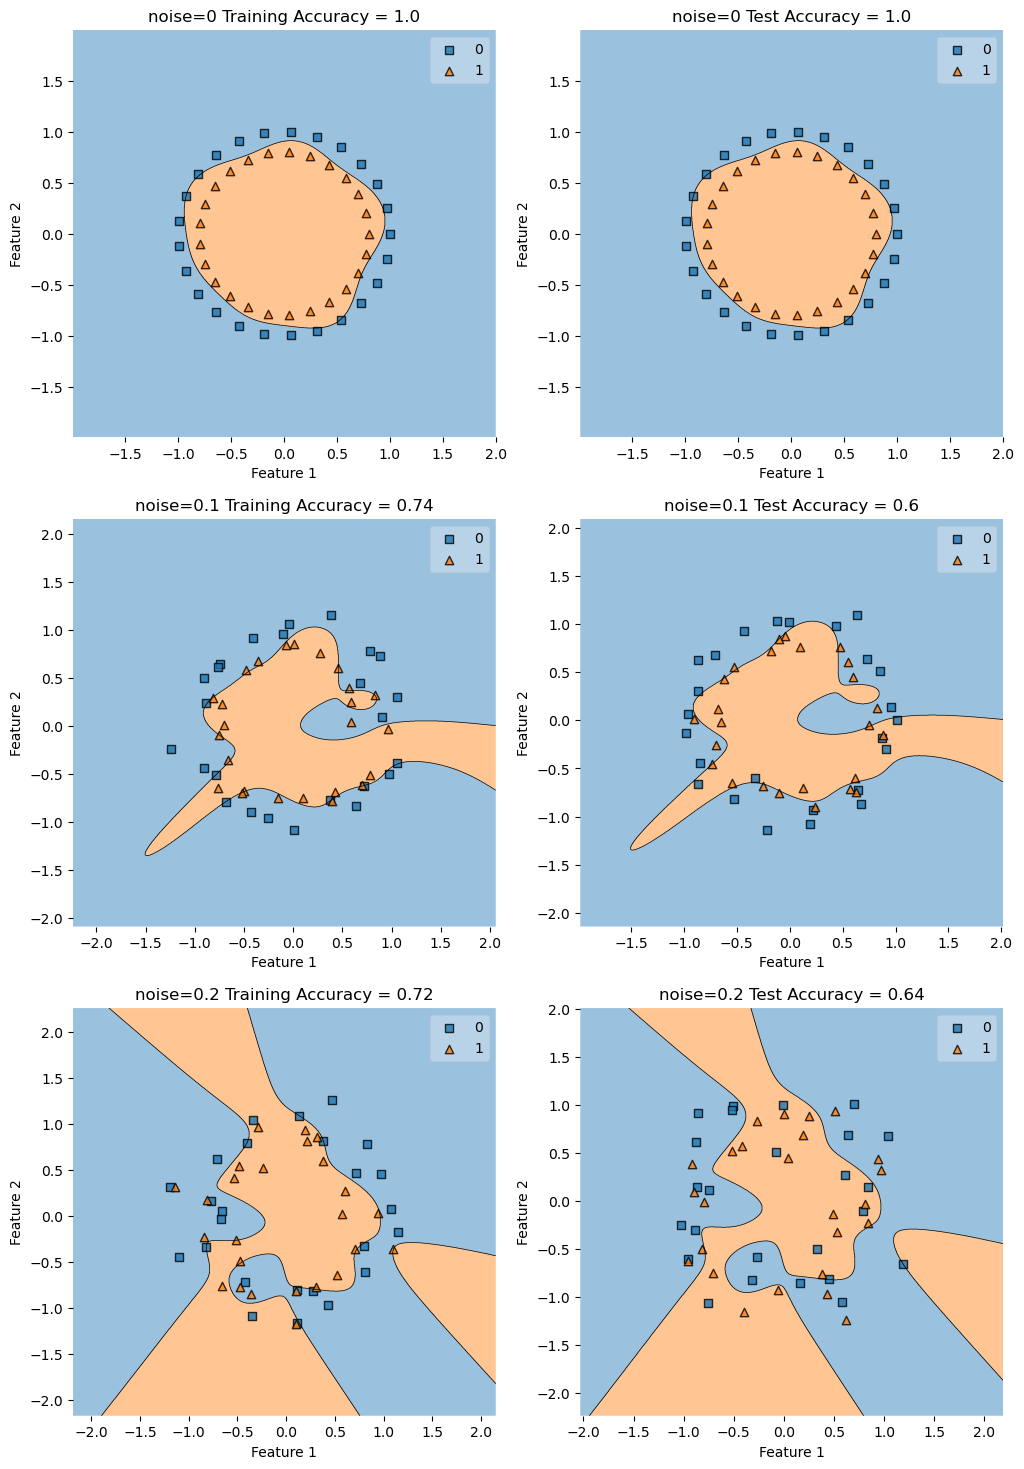

In [9]:
noises = [0, .1, .2]
fig, axarr = plt.subplots(len(noises), 2, figsize=(12, 6*len(noises)))
gamma = 10
for i, noise in enumerate(noises):
    X_train, y_train = make_circles(50, shuffle = True, noise = noise)
    X_test, y_test = make_circles(50, shuffle = True, noise = noise)
    KLR = KernelLogisticRegression(rbf_kernel, gamma=gamma)
    KLR.fit(X_train, y_train)
    construct_plot(X_train, y_train, KLR, axarr[i][0], f"noise={noise} Training Accuracy = ")
    construct_plot(X_test, y_test, KLR, axarr[i][1], f"noise={noise} Test Accuracy = ")

##### Conclusions from Experiment 4

When there is no noise pretty much any reasonable gamma will do, but once there starts to be signficant noise, the lower gamma value does better on this set.